### For this homework, I used data from NYC to visually illustrate the relationship between Building Floor Area and Green House Gas Emissions using a Scatterplot.  The final figure is illustrated at the end of the notebook (please scroll down)

In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
import os
# import json

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
url = 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv'

In [3]:
!curl -O 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3110k  100 3110k    0     0  3265k      0 --:--:-- --:--:-- --:--:-- 4152k


In [4]:
os.system("mv rows.csv " + os.getenv("PUIDATA")) #moving file to PUIdata in local folder

0

In [5]:
df = pd.read_csv('https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv')

In [6]:
df.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [7]:
df.columns

Index(['Record Number', 'NYC Borough, Block, and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [8]:
df.drop(['NYC Borough, Block, and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'], 
        axis = 1, inplace=True)

In [9]:
# df.dropna() drops all rows with NAN values. 
# df.dropna(how=all) if all columns are Nan 
# df.dropna(subset = ['column1_name', 'column2_name', 'column3_name'])

In [10]:
df_cleaned = df.dropna() 
df_cleaned.head()

,Record Number,Total GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²)
16,3028,3556.4,330000
38,12306,0,61219
44,15011,9525,841709
45,9863,1356.2,390400
56,12237,2641.2,528060


#### Graph Total Green House Gas Emissions by Building (Property) Floor Area

In [11]:
#rename columns for easier manipulation and easier plot comprehension 

In [12]:
df_renamed = df_cleaned.rename(columns={'Total GHG Emissions(MtCO2e)': 'GHG Emissions', 'Reported Property Floor Area (Building(s)) (ft²)': 'Reported Floor Area'})

In [13]:
df_renamed['Reported Floor Area'] #which checking column, found text "strings" in column called "not available"

16              330000
38               61219
44              841709
45              390400
56              528060
64               59468
65              364000
68              230000
69               76752
73              175601
74                   0
75               91968
76              235370
77               64806
78               62839
79               98000
80               53275
81               61846
82              204417
83               60110
84              457946
85              511001
86               56442
88               78435
89               80293
90              104990
91              528180
92              440895
93               69656
94               62300
             ...      
13885           135743
13886    Not Available
13887           214370
13888           179167
13889            50400
13892           179167
13893            55037
13898          1587872
13900    Not Available
13902            18624
13904            55000
13905            20115
13907      

In [14]:
df_numeric_conversion = df_renamed.apply(pd.to_numeric, errors='coerce') #convert strings to numbers (NANs) to create pure numeric column

In [15]:
df_numeric_conversion #Reported Floor Area column with instances of text "not available" has been converted to NAN

,Record Number,GHG Emissions,Reported Floor Area
16,3028,3556.4,330000.0
38,12306,0.0,61219.0
44,15011,9525.0,841709.0
45,9863,1356.2,390400.0
56,12237,2641.2,528060.0
64,977,584.4,59468.0
65,1256,3613.0,364000.0
68,12159,88.1,230000.0
69,12179,404.6,76752.0
73,12206,3.6,175601.0


In [16]:
df_final = df_numeric_conversion.dropna() #drop the NaN values again from this column

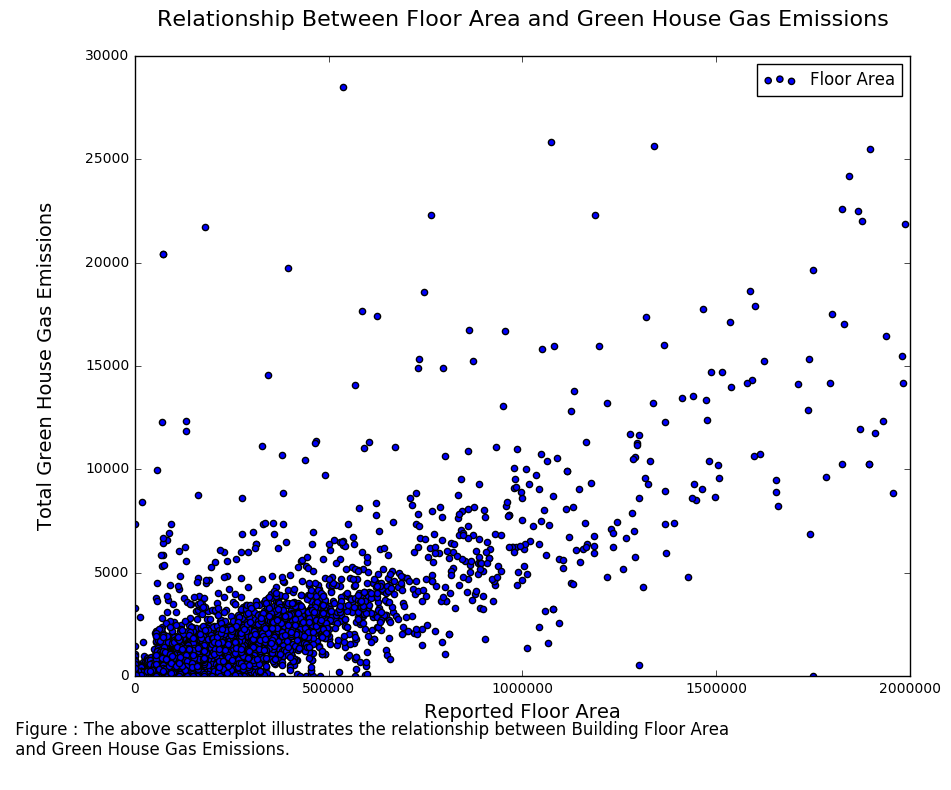

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(df_final['Reported Floor Area'],df_final['GHG Emissions'], label = 'Floor Area')
plt.axis([0, 2000000, 0, 30000], s = 10)
plt.xlabel('Reported Floor Area\n\n', fontsize = 14)
plt.ylabel('Total Green House Gas Emissions\n', fontsize = 14)
plt.title('Relationship Between Floor Area and Green House Gas Emissions\n', fontsize = 16)
plt.legend(loc = 'upper right')

figtext(.000001, .000001, "\n\n\n\n\n Figure : The above scatterplot illustrates the relationship between Building Floor Area \n and Green House Gas Emissions.\n", fontsize = 12)